In [14]:
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
toi_file = 'toi-plus-2019-05-08.csv'
df = pd.read_csv(toi_file)

# Sort by orbital period
df = df.sort_values(by=['Period'])

# Number of TOIs
n_toi = df.shape[0]

In [16]:
df

,src,tic_id,toi_id,Disposition,RA,Dec,Tmag,Tmag Err,Epoc,Epoc Err,...,Centroid offset,Master,SG1a,SG1b,SG2,SG3,SG4,SG5,Created,Updated
365,qlp,144336525,326.01,PC,356.114886,-46.866585,11.69900,0.018000,1354.259540,0.000910,...,False,3,4,3,3,4,4,4,2018-10-03 02:14:38.700781+00:00,2018-12-20 19:39:09.861126+00:00
232,spoc,121338379,498.01,PC,129.090880,-3.860234,9.52700,0.018000,1491.891750,0.000553,...,False,3,3,3,3,4,4,4,2019-03-08 14:44:07.755970+00:00,2019-03-14 21:21:14.678417+00:00
450,spoc,244161191,278.01,O,4.883100,-5.911300,13.09900,0.059000,1386.106592,0.000835,...,False,5,5,5,5,5,5,5,2018-11-30 23:29:50.721617+00:00,2018-12-05 19:41:49.688983+00:00
208,spoc,238004786,539.01,PC,102.568448,-53.005629,10.54400,0.018000,1468.352187,0.002198,...,False,2,4,1,1,4,4,4,2019-02-26 17:36:54.158652+00:00,2019-03-15 00:58:11.971131+00:00
531,spoc,206609630,212.01,PC,22.551000,-59.583200,12.18600,0.040000,1325.491317,0.000070,...,False,3,4,3,3,4,4,4,2018-10-22 18:35:11.915386+00:00,2018-11-15 19:03:51.078987+00:00
284,spoc,77228304,456.01,PC,69.116194,-41.246255,15.70300,0.018000,1410.950284,0.002187,...,False,3,4,3,3,4,4,4,2019-01-31 17:54:45.707173+00:00,2019-02-08 19:51:14.227036+00:00
309,qlp,9858404,394.01,PC,48.499528,-8.573568,7.95600,0.019000,1411.269470,0.001010,...,False,3,4,3,3,4,4,4,2019-01-16 19:24:30.652495+00:00,2019-02-08 18:54:06.374116+00:00
194,spoc,19451711,522.01,PC,124.602799,-7.571285,7.35900,0.019000,1491.704967,0.001292,...,False,1,4,1,1,4,4,4,2019-03-18 17:05:00.193935+00:00,2019-03-20 15:50:12.544981+00:00
324,qlp,279251651,419.01,PC,104.155300,-59.183300,10.52100,0.040000,1354.466630,0.001430,...,False,2,4,1,2,4,4,4,2019-01-16 19:24:28.433284+00:00,2019-02-08 18:54:04.690114+00:00
91,spoc,146463781,636.01,PC,123.885600,-31.556800,14.88400,0.059000,1517.476816,0.002485,...,False,3,4,3,3,4,4,4,2019-04-11 19:30:28.244534+00:00,2019-04-19 14:05:41.156875+00:00


How should we define when the transit time is "lost?"
- When the uncertainty is larger than the transit duration?
- When the uncertainty is larger than a single HST orbit (90 min)?
- When the uncertainty is larger than a single night (8 hr)?
- When the uncertainty is a certain percentage of the orbital period?

Let's consider each of these.

In [17]:
# Transit duration
df['t_to_loss1'] = (df['Duration']/24./df['Period Err'])*df['Period']/365.2422
n_1 = sum(df['t_to_loss1'] < 1)

# HST orbit
df['t_to_loss2'] = (90./1440./df['Period Err'])*df['Period']/365.2422
n_2 = sum(df['t_to_loss2'] < 1)

# Single night
df['t_to_loss3'] = (8./24./df['Period Err'])*df['Period']/365.2422
n_3 = sum(df['t_to_loss3'] < 1)

# 10% of orbital period
df['t_to_loss4'] = (0.1*df['Period']/df['Period Err'])*df['Period']/365.2422
n_4 = sum(df['t_to_loss4'] < 1)

And what fraction are lost within a certain timeframe?

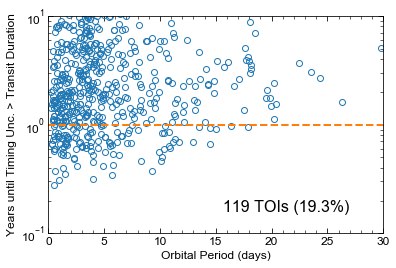

In [18]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
ax.plot(df['Period'], df['t_to_loss1'], marker='o', mfc='None', mec='C0', ls='')
ax.axhline(1, color='C1', ls='--')
ax.text(0.9, 0.1, f'{n_1} TOIs ({100*n_1/n_toi:.1f}%)', 
        transform=ax.transAxes, ha='right', fontsize=16)
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel(r'Years until Timing Unc. > Transit Duration')
ax.set_xlim(0, 30)
ax.set_ylim(0.1, 10)
ax.set_yscale('log')
plt.savefig('t_to_loss1.pdf', bbox_inches='tight')

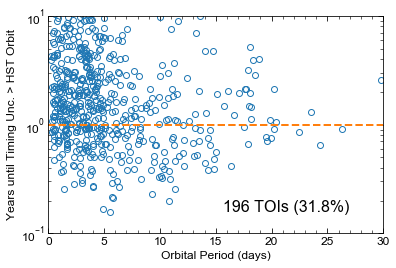

In [19]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
ax.plot(df['Period'], df['t_to_loss2'], marker='o', mfc='None', mec='C0', ls='')
ax.axhline(1, color='C1', ls='--')
ax.text(0.9, 0.1, f'{n_2} TOIs ({100*n_2/n_toi:.1f}%)', 
        transform=ax.transAxes, ha='right', fontsize=16)
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel(r'Years until Timing Unc. > HST Orbit')
ax.set_xlim(0, 30)
ax.set_ylim(0.1, 10)
ax.set_yscale('log')
plt.savefig('t_to_loss2.pdf', bbox_inches='tight')

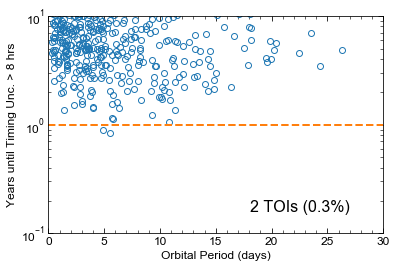

In [20]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
ax.plot(df['Period'], df['t_to_loss3'], marker='o', mfc='None', mec='C0', ls='')
ax.axhline(1, color='C1', ls='--')
ax.text(0.9, 0.1, f'{n_3} TOIs ({100*n_3/n_toi:.1f}%)', 
        transform=ax.transAxes, ha='right', fontsize=16)
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel(r'Years until Timing Unc. > 8 hrs')
ax.set_xlim(0, 30)
ax.set_ylim(0.1, 10)
ax.set_yscale('log')
plt.savefig('t_to_loss3.pdf', bbox_inches='tight')

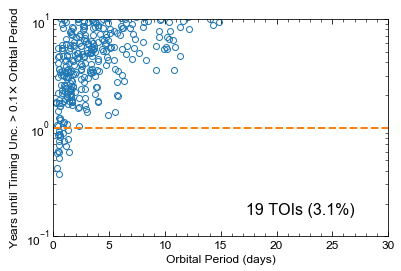

In [21]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
ax.plot(df['Period'], df['t_to_loss4'], marker='o', mfc='None', mec='C0', ls='')
ax.axhline(1, color='C1', ls='--')
ax.text(0.9, 0.1, f'{n_4} TOIs ({100*n_4/n_toi:.1f}%)', 
        transform=ax.transAxes, ha='right', fontsize=16)
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel(r'Years until Timing Unc. > 0.1${\times}$ Orbital Period')
ax.set_xlim(0, 30)
ax.set_ylim(0.1, 10)
ax.set_yscale('log')
plt.savefig('t_to_loss4.pdf', bbox_inches='tight')

Now let's just consider the planets in group `t_to_loss2` and take a look at their parameters.

In [22]:
df.keys()

Index(['src', 'tic_id', 'toi_id', 'Disposition', 'RA', 'Dec', 'Tmag',
       'Tmag Err', 'Epoc', 'Epoc Err', 'Period', 'Period Err', 'Duration',
       'Duration Err', 'Transit Depth', 'Transit Depth Err', 'Sectors',
       'comments', 'logg', 'logg Err', 'N_planets', 'R_s', 'R_s Err', 'R_p',
       'R_p Err', 'T_eq', 'T_eff', 'T_eff Err', 'Insol_p', 'SNR_p',
       'Centroid offset', 'Master', 'SG1a', 'SG1b', 'SG2', 'SG3', 'SG4', 'SG5',
       'Created', 'Updated', 't_to_loss1', 't_to_loss2', 't_to_loss3',
       't_to_loss4'],
      dtype='object')

In [24]:
df2 = df[df['t_to_loss2'] < 1].copy()

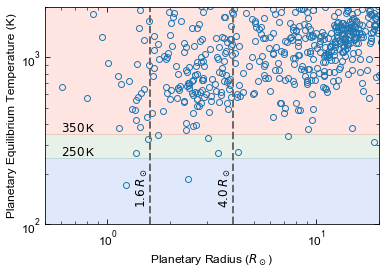

In [90]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
ax.fill_between(x=[0, 20], y1=[0, 0], y2=[250, 250], color='cornflowerblue', alpha=0.2)
ax.fill_between(x=[0, 20], y1=[250, 250], y2=[350, 350], color='darkseagreen', alpha=0.2)
ax.fill_between(x=[0, 20], y1=[350, 350], y2=[2000, 2000], color='salmon', alpha=0.2)
ax.plot(df['R_p'], df['T_eq'], marker='o', mfc='None', mec='C0', ls='')
ax.axvline(1.6, color='dimgray', ls='--')
ax.axvline(4, color='dimgray', ls='--')
ax.text(0.6, 250, r'$250\,$K', ha='left', va='bottom')
ax.text(0.6, 350, r'$350\,$K', ha='left', va='bottom')
ax.text(1.6, 125, r'$1.6\,R_\odot$', rotation=90, ha='right', va='bottom')
ax.text(4.0, 125, r'$4.0\,R_\odot$', rotation=90, ha='right', va='bottom')
ax.set_xlabel(r'Planetary Radius ($R_\odot$)')
ax.set_ylabel(r'Planetary Equilibrium Temperature (K)')
# ax.set_xlim(0, 20)
# ax.set_ylim(100, 2000)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.5, 20)
ax.set_ylim(100, 2000)
plt.savefig('radius_temp2.pdf', bbox_inches='tight')